
## Открытый курс по машинному обучению
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [3]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

In [4]:
data = pd.read_csv('../adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [5]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. Каков средний возраст (признак *age*) женщин?**

In [6]:
data[(data['sex'] == 'Female')]['age'].mean()

36.85823043357163

**3. Какова доля граждан Германии (признак *native-country*)?**

In [7]:
data['native-country'].value_counts(normalize = True)['Germany']

0.004207487485028101

**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

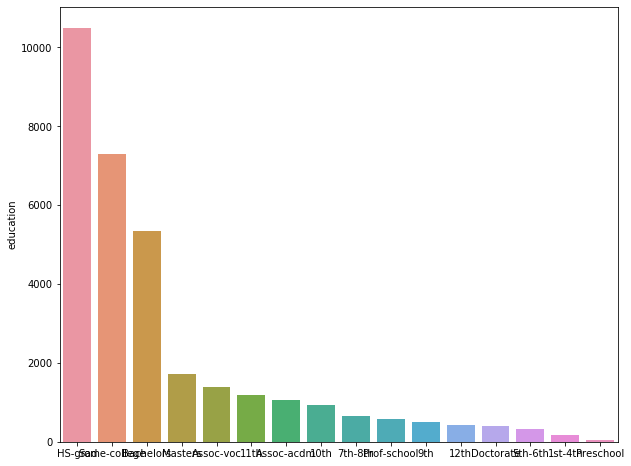

In [8]:
df = data['education'].value_counts().to_frame()
sns.barplot(df.index, df.education)

**5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [9]:
data[data['salary']=='>50K']['age'].mean()

44.24984058155847

In [10]:
data[data['salary']=='>50K']['age'].std()

10.519027719851826

In [11]:
data[data['salary']=='<=50K']['age'].mean()

36.78373786407767

In [12]:
data[data['salary']=='<=50K']['age'].std()

14.02008849082488

**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [22]:
df = data[data['salary']=='>50K']
# higher_degree = set(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters','Doctorate'])
# education_filter = lambda education: education not in higher_degree
education_filter = lambda education: education not in('Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate')
df[ df['education'].map(education_filter)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
55,43,Private,237993,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
67,53,Private,169846,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
68,49,Self-emp-inc,191681,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
84,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K
86,49,Local-gov,268234,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
97,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K


In [239]:
 data[data['salary']=='>50K']['education'].value_counts()

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [240]:
data.groupby(['race','sex'])['age'].describe()

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [241]:
data.groupby(data['marital-status'].str.startswith('Married'))['salary'].value_counts(normalize = True)

marital-status  salary
False           <=50K     0.935546
                >50K      0.064454
True            <=50K     0.563080
                >50K      0.436920
Name: salary, dtype: float64

**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [242]:
max_hours = data['hours-per-week'].max()
max_hours

99

In [243]:
len(data[(data['hours-per-week'] == max_hours)].index)

85

In [244]:
data[(data['hours-per-week'] == max_hours)]['salary'].value_counts(normalize=True)['>50K']

0.29411764705882354

**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [245]:
data.groupby(['native-country','salary'])['hours-per-week'].mean().to_frame()

hours-per-week
native-country             salary                
?                          <=50K        40.164760
                           >50K         45.547945
Cambodia                   <=50K        41.416667
                           >50K         40.000000
Canada                     <=50K        37.914634
                           >50K         45.641026
China                      <=50K        37.381818
                           >50K         38.900000
Columbia                   <=50K        38.684211
                           >50K         50.000000
Cuba                       <=50K        37.985714
                           >50K         42.440000
Dominican-Republic         <=50K        42.338235
                           >50K         47.000000
Ecuador                    <=50K        38.041667
                           >50K         48.750000
El-Salvador                <=50K        36.030928
                           >50K         45.000000
England                    <=50K        40.483333
                           >50K         44.533333
France                     <=50K        41.058824
                           >50K         50.750000
Germany                    <=50K        39.139785
                           >50K         44.977273
Greece                     <=50K        41.809524
                           >50K         50.625000
Guatemala                  <=50K        39.360656
                           >50K         36.666667
Haiti                      <=50K        36.325000
                           >50K         42.750000
...                                           ...
Mexico                     >50K         46.575758
Nicaragua                  <=50K        36.093750
                           >50K         37.500000
Outlying-US(Guam-USVI-etc) <=50K        41.857143
Peru                       <=50K        35.068966
                           >50K         40.000000
Philippines                <=50K        38.065693
                           >50K         43.032787
Poland                     <=50K        38.166667
                           >50K         39.000000
Portugal                   <=50K        41.939394
                           >50K         41.500000
Puerto-Rico                <=50K        38.470588
                           >50K         39.416667
Scotland                   <=50K        39.444444
                           >50K         46.666667
South                      <=50K        40.156250
                           >50K         51.437500
Taiwan                     <=50K        33.774194
                           >50K         46.800000
Thailand                   <=50K        42.866667
                           >50K         58.333333
Trinadad&Tobago            <=50K        37.058824
                           >50K         40.000000
United-States              <=50K        38.799127
                           >50K         45.505369
Vietnam                    <=50K        37.193548
                           >50K         39.200000
Yugoslavia                 <=50K        41.600000
                           >50K         49.500000

[82 rows x 1 columns]